In [2]:
from utils.epg import *
import matplotlib.pyplot as plt
from copy import copy
cmap = copy(plt.cm.get_cmap("jet"))
from scipy.optimize import least_squares

In [3]:
degree = r"${}^{\circ}$"
GeV = "GeV"
GeV2 = "GeV"+r"${}^{2}$"
GeVc = "GeV/c"
GeVc2 = "(GeV/c)"+r"${}^{2}$"

In [22]:
import matplotlib
# initial settings
pgf_with_latex = {
		"pgf.texsystem": "pdflatex",
		"text.usetex": True,            # use LaTeX to write all text
		"font.family": "sans-serif",         
		"font.sans-serif": "Helvetica",
		"font.size": 25,				# default font size
		"axes.labelsize": 24,			# x and y label size
		"axes.titlesize": 24,           # subfigure title size, i.e. title size when one figure
		"legend.fontsize": 22,			# legend size
		"xtick.labelsize": 23,			# x axis tick label size
		"ytick.labelsize": 23,			# y axis tick label 
		"figure.titlesize": 25,         # Figure title size, useful when you have multiple plots in one canvas.
		"pgf.preamble": r"\usepackage{xcolor}"     # xcolor for colours
}
matplotlib.rcParams.update(pgf_with_latex)

In [4]:
expDvcsInb = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/dvcs_inb.pkl")
expDvcsOutb = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/dvcs_outb.pkl")

In [5]:
job2942_0 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_0.pkl")
job2942_0_gen = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_0.gen.pkl")
job2942_1 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_1.pkl")
job2942_1_gen = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_1.gen.pkl")
job2942_2 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_2.pkl")
job2942_2_gen = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_2.gen.pkl")
job2942_3 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_3.pkl")
job2942_3_gen = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_3.gen.pkl")
job2942_4 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_4.pkl")
job2942_4_gen = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_4.gen.pkl")
job2942_5 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_5.pkl")
job2942_5_gen = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_5.gen.pkl")
job2942_6 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_6.pkl")
job2942_6_gen = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_6.gen.pkl")
job2942_7 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_7.pkl")
job2942_7_gen = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_7.gen.pkl")
job2942_8 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_8.pkl")
job2942_8_gen = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_8.gen.pkl")
job2942_9 = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_9.pkl")
job2942_9_gen = pd.read_pickle("/Users/sangbaek/Dropbox (MIT)/data/pickles/2942_9.gen.pkl")

In [6]:
def drawKine(sim1, sim2, exp=None, save = None):
    varstoplot = ["nu", "W", "Q2", "xB", "t2", "phi2"]
    title = [r"$\nu$", r"$W$", r"$Q^{2}$", r"$x_{B}$", r"$-t$", r"$\phi_{trento}$"]
    unit = [GeV, GeV, GeVc2, None, GeV2, degree]
    binstarts = [2, 2, 1, 0, 0, 0]
    binends = [9, 4, 10, 1, 1.7, 360]
    fig, axs = plt.subplots(2, 3, figsize = (15, 10))
    for xind in range(0,3):
        for yind in range(0, 2):
            ind =xind+3*yind
            start = binstarts[ind]
            end = binends[ind]
            bins = np.linspace(start, end, 51)
            axs[yind, xind].hist(sim1[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
            axs[yind, xind].hist(sim2[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
            if exp is not None:
                axs[yind, xind].hist(exp[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
            axs[yind, xind].set_title(title[ind])
            axs[yind, xind].set_xlim([start, end])
            if (unit[ind]):
                axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
            else:
                axs[yind, xind].set_xlabel(title[ind])
    axs[0, 0].set_xticks([2, 4, 6, 8, 9])
    axs[0, 2].set_xticks([1, 4, 7, 10])
    axs[1, 1].set_xticks([0, 1, 1.7])
    axs[1, 2].set_xticks(np.linspace(0, 360, 7))
    
    plt.tight_layout()
    if save:
        plt.savefig(save)
    else:
        plt.show()
    plt.clf()

In [7]:
def drawExcl(sim1, sim2, exp=None, save = None):
    varstoplot = ["coneAngle", "reconGam", "coplanarity", "ME_epg", "MM2_epg", "MM2_eg", "MM2_ep", "MPt"]
    title = [r"$\theta_{e'\gamma}$", r"$\theta_{\gamma_{det.}\gamma_{rec.}}$", r"$\Delta\phi$" , "ME"+r"${}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'p'\gamma}$", "MM"+r"${}^{2}_{e'\gamma}$", "MM"+r"${}^{2}_{e'p'}$", "MPt"+r"${}_{e'p'\gamma}$"]
    unit = [degree, degree, degree, GeV, GeV2, GeV2, GeV2, GeVc]
    binstarts = [20, 0, 0, -0.5, -0.025, 0.1,-0.25 , 0]
    binends = [50, 2.5, 20, 1.5, 0.025, 1.7, 0.25, 0.25]
    fig, axs = plt.subplots(2, 4, figsize = (15,10))
    for yind in range(0, 2):
        for xind in range(0,4):
            ind = 4*yind + xind
            start = binstarts[ind]
            end = binends[ind]
            bins = np.linspace(start, end, 101)
            axs[yind, xind].hist(sim1[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
            axs[yind, xind].hist(sim2[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
            if exp is not None:
                axs[yind, xind].hist(exp[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
            axs[yind, xind].set_title(title[ind])
            axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
            axs[yind, xind].set_xlim([start, end])
    axs[0, 0].set_xticks([20, 35, 50])
    axs[0, 1].set_xticks([0, 1.25, 2.5])
    axs[0, 3].set_xticks([-0.5, 0, 0.5, 1, 1.5])
    axs[1, 1].set_xticks([0.1, 1, 1.7])
    axs[1, 3].set_xticks([0, 0.125, 0.25])
    plt.tight_layout()
    if save:
        plt.savefig(save)
    else:
        plt.show()
    plt.clf()

In [8]:
def drawVertex(sim1, sim2, exp=None, save = None):
    varstoplot = ["Evx", "Evy", "Evz", "Etheta", "Ptheta", "Gtheta", "Ephi", "Gphi", "Gphi"]
    title = [r"$vx_{e'}$", r"$vy_{e'}$", r"$vz_{e'}$", r"$\theta_{e'}$", r"$\theta_{p'}$", r"$\theta_{\gamma}$", r"$\phi_{e'}$", r"$\phi_{p'}$", r"$\phi_{\gamma}$" ]
    unit = ["cm", "cm", "cm", degree, degree, degree, degree, degree, degree]
    binstarts = [-0.2, -1, -6, 0, 0, 0, -180, -180, -180]
    binends = [0.2, 1, 0, 45, 45, 45, 180, 180, 180]
    fig, axs = plt.subplots(3, 3, figsize = (15,15))
    for xind in range(0,3):
        for yind in range(0, 3):
            ind =xind+3*yind
            start = binstarts[ind]
            end = binends[ind]
            bins = np.linspace(start, end, 51)
            axs[yind, xind].hist(sim1[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
            axs[yind, xind].hist(sim2[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
            if exp is not None:
                axs[yind, xind].hist(exp[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
            axs[yind, xind].set_title(title[ind])
            axs[yind, xind].set_xlim([start, end])
            if (unit[ind]):
                axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
            else:
                axs[yind, xind].set_xlabel(title[ind])
    for i in range(3):
        axs[1, i].set_xticks([0, 15, 30, 45])
    for i in range(3):
        axs[2, i].set_xticks(np.linspace(-180, 180, 5))
    plt.tight_layout()
    if save:
        plt.savefig(save)
    else:
        plt.show()
    plt.clf()

In [9]:
def drawCartesian(sim1, sim2, exp=None, save = None):
    varstoplot = ["Epx", "Ppx", "Gpx", "Epy", "Ppy", "Gpy", "Epz", "Ppz", "Gpz", "Ep", "Pp", "Gp"]
    title = [r"$px_{e'}$", r"$px_{p'}$", r"$px_{\gamma}$", r"$py_{e'}$", r"$py_{p'}$", r"$py_{\gamma}$", r"$pz_{e'}$", r"$pz_{p'}$", r"$pz_{\gamma}$", r"$p_{e'}$", r"$p_{p'}$", "$p_{\gamma}$"]
    unit = [GeVc, GeVc, GeVc2, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc, GeVc]
    binstarts = [-2, -2, -2, -2, -2, -2, 0, -2, 0, 0, 0, 0]
    binends = [2, 2, 2, 2, 2, 2, 10, 3, 10, 10, 3, 10]
    fig, axs = plt.subplots(4, 3, figsize = (15,20))
    for xind in range(0,3):
        for yind in range(0, 4):
            ind =xind+3*yind
            start = binstarts[ind]
            end = binends[ind]
            bins = np.linspace(start, end, 51)
            axs[yind, xind].hist(sim1[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='r')
            axs[yind, xind].hist(sim2[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='b')
            if exp is not None:
                axs[yind, xind].hist(exp[varstoplot[ind]], bins = bins, density = True, histtype='stepfilled', facecolor='none', edgecolor='k')
            axs[yind, xind].set_title(title[ind])
            axs[yind, xind].set_xlim([start, end])
            if (unit[ind]):
                axs[yind, xind].set_xlabel(title[ind]+" [" + unit[ind] +"]")
            else:
                axs[yind, xind].set_xlabel(title[ind])
    plt.tight_layout()
    if save:
        plt.savefig(save)
    else:
        plt.show()
    plt.clf()

In [13]:
bh =   [1.8475392809474710*10**(-2),  1.7145175936640097*10**(-2),  1.5265841414860903*10**(-2),  1.3173090093335369*10**(-2),  1.1131387456582377*10**(-2),  9.2970749262339825*10**(-3),  7.7341170882306602*10**(-3),  6.4471593656737474*10**(-3),  5.4106932055266671*10**(-3),  4.5882195108259295*10**(-3),  3.9426831364099213*10**(-3),  3.4412066863488419*10**(-3),  3.0566472719972329*10**(-3),  2.7676342394053139*10**(-3),  2.5579908830927630*10**(-3),  2.4160168311374059*10**(-3),  2.3338422632623937*10**(-3),  2.3069424680418897*10**(-3),  2.3338422393357388*10**(-3),  2.4160166397005048*10**(-3),  2.5579909081333610*10**(-3),  2.7676342541844601*10**(-3),  3.0566468289295917*10**(-3),  3.4412071063545935*10**(-3),  3.9426835465259215*10**(-3),  4.5882190963878675*10**(-3),  5.4106931501926390*10**(-3),  6.4471589116281485*10**(-3),  7.7341162366855046*10**(-3),  9.2970740546124662*10**(-3),  1.1131385613722105*10**(-2),  1.3173088090484441*10**(-2),  1.5265839399700836*10**(-2),  1.7145173892958009*10**(-2),  1.8475392507581800*10**(-2),  1.8959095088131633*10**(-2)]
bhphi = [10*i+10 for i in range(36)]

In [15]:
def dfInOneBin(df):
    binQ2lower = df["Q2"] > 2.2
    binQ2upper = df["Q2"] < 2.7
    binxBlower = df["xB"] > 0.3
    binxBupper = df["xB"] < 0.38
    bintlower = df["t2"] > 0.3
    bintupper = df["t2"] < 0.39
    return df[binQ2lower & binQ2upper &
              binxBlower & binxBupper & bintlower & bintupper]

In [16]:
dvcs_data = dfInOneBin(expDvcsInb)

In [17]:
dvcs_rec = pd.concat([dfInOneBin(df) for df in [job2942_0, job2942_1, job2942_2, job2942_3, job2942_4, job2942_5, job2942_6, job2942_7, job2942_8, job2942_9]])

In [18]:
dvcs_gen = pd.concat([dfInOneBin(df) for df in [job2942_0_gen, job2942_1_gen, job2942_2_gen, job2942_3_gen, job2942_4_gen, job2942_5_gen, job2942_6_gen, job2942_7_gen, job2942_8_gen, job2942_9_gen]])

In [19]:
phi_data = dvcs_data["phi2"]
phi_rec = dvcs_rec["phi2"]
phi_gen = dvcs_gen["phi2"]

In [20]:
phi_edges = np.linspace(0,360, 21)
phiData_entries, bins = np.histogram(phi_data, bins=phi_edges)
phiRec_entries, bins = np.histogram(phi_rec, bins=phi_edges)
phiGen_entries, bins = np.histogram(phi_gen, bins=phi_edges)
binscenters = np.array([0.5 * (bins[i] + bins[i + 1])
                        for i in range(len(bins) - 1)])

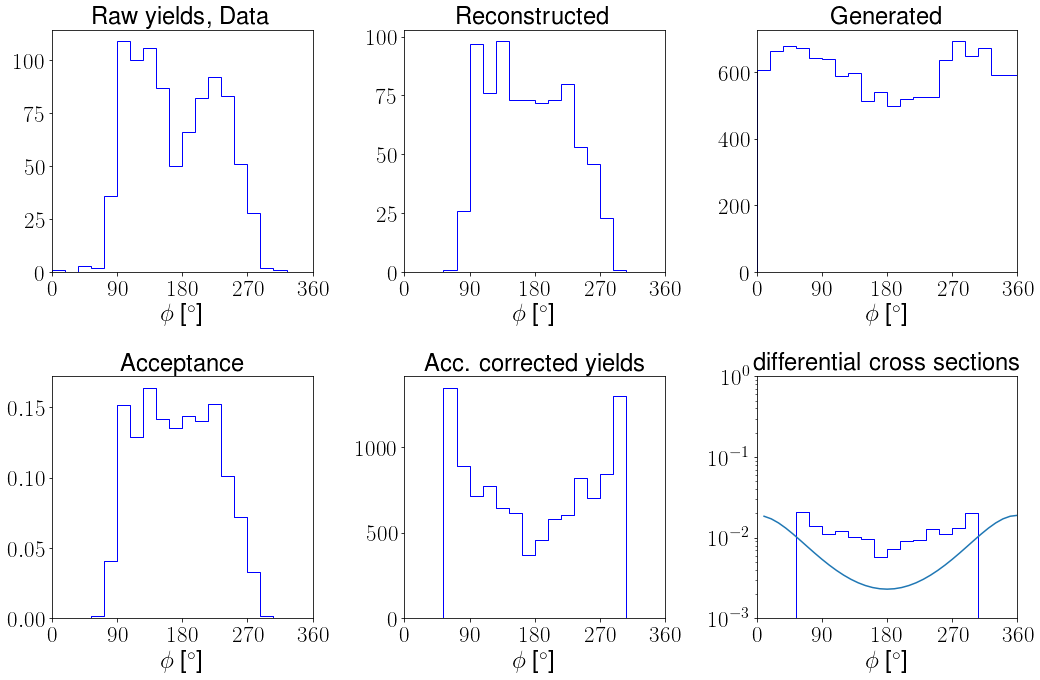

In [23]:
fig, axs = plt.subplots(2, 3, figsize = (15,10))
axs[0,0].hist(phi_data, bins= phi_edges, histtype='stepfilled', facecolor='none', edgecolor='b')
axs[0,0].set_title("Raw yields, Data")
axs[0,1].hist(phi_rec, bins= phi_edges, histtype='stepfilled', facecolor='none', edgecolor='b')
axs[0,1].set_title("Reconstructed")
axs[0,2].hist(phi_gen, bins= phi_edges, histtype='stepfilled', facecolor='none', edgecolor='b')
axs[0,2].set_title("Generated")
acc = phiRec_entries/phiGen_entries
axs[1,0].step(binscenters, phiRec_entries/phiGen_entries, where='mid',color='b', linewidth=1)
axs[1,0].bar(binscenters, phiRec_entries/phiGen_entries, width=np.diff(bins), color = 'w', facecolor='w')
axs[1,0].set_title("Acceptance")
accCorrectedData = acc
for ind, val in enumerate(acc):
    if val ==0:
        accCorrectedData[ind] = 0
    else:
        accCorrectedData[ind] = phiData_entries[ind]/val
axs[1,1].step(binscenters, accCorrectedData, where='mid',color='b', linewidth=1)
axs[1,1].bar(binscenters, accCorrectedData, width=np.diff(bins), color = 'w', facecolor='w')
axs[1,1].set_title("Acc. corrected yields")
axs[1,2].step(binscenters, accCorrectedData/56.5/0.08/0.5/0.09/(np.pi*2/20)/10**6, where='mid',color='b', linewidth=1)
axs[1,2].bar(binscenters, accCorrectedData/56.5/0.08/0.5/0.09/(np.pi*2/20)/10**6, width=np.diff(bins), color = 'w', facecolor='w')
axs[1,2].set_title("differential cross sections")
axs[1,2].set_yscale('log', base=10)
axs[1,2].set_ylim([0.001, 1])

axs[1,2].plot(bhphi, bh)

for ax in axs.reshape(6,):
    ax.set_xlim([0, 360])
    ax.set_xticks(np.linspace(0, 360, 5))
    ax.set_xlabel("$\phi$"+" ["+r"${}^{\circ}$"+"]")
plt.tight_layout()
plt.show()

#     binQ2lower = df["Q2"] > 2.2
#     binQ2upper = df["Q2"] < 2.7
#     binxBlower = df["xB"] > 0.3
#     binxBupper = df["xB"] < 0.38
#     bintlower = df["t2"] > 0.3
#     bintupper = df["t2"] < 0.39
